In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
a = np.load("../results/arch_cpp/pixel_1000_step_6_scale_200.npy")
b = np.load("../results/arch_python/pixel_1000_step_6_scale_200.npy")
np.allclose(a,b)

True

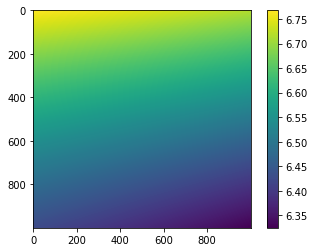

In [10]:
plt.imshow(a)
plt.colorbar()

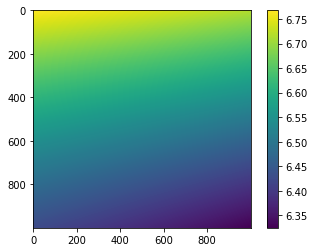

In [11]:
plt.imshow(b)
plt.colorbar()


In [2]:
from src.apps.legendre import normalize
import numpy as np
from src.apps.normalized_legendre import normalize_pkm

In [5]:
print (normalize_pkm(4,2,np.float64(0.554455555)))
print (normalize(4,2,np.float64(0.554455555)))

1.8871559012013894
1.8871559012013894


In [9]:
type(normalize(3,2,np.float64(0.5)))

float

In [4]:
num = np.float64(0.5222254222)
num_cos = np.cos(num)

In [5]:
type(num_cos)

numpy.float64

In [19]:
import numpy as np
import math
def caculate_nkm(k,m): # right
    if m == 0:
        delta_0m = 1
    else:
        delta_0m = 0
    nkm = np.float64()
    nkm = (2-delta_0m) * (2*k+1) * math.factorial(k-m) / math.factorial(k+m)
    return np.sqrt(nkm)

def caculate_pkm(k,m,theta):
    if m == 0:
        if k == 0:
            return 1
        if k == 1:
            return np.cos(theta)
        if k > 1:
            factory_1 = caculate_pkm(k-1,m,theta)*np.cos(theta)*(2*k-1)
            factory_2 = caculate_pkm(k-2,m,theta)*(k-1)
            return (factory_1-factory_2) / k
    elif m >= 1:
        factory_1 = caculate_pkm(k-1,m-1,theta)*(k+m-1)
        factory_2 = caculate_pkm(k,m-1,theta)*np.cos(theta)*(k-m+1)
        return (factory_1-factory_2) / np.sqrt(1-np.power(np.cos(theta),2))

def normalize_pkm(k,m,theta):
    return caculate_nkm(k,m) * caculate_pkm(k,m,theta)

theta = np.float64(0.555555)
# caculate_nkm(4,2)
caculate_pkm(4,2,theta)

8.455220771625807

In [17]:
caculate_pkm(2,0,theta)
# caculate_pkm(2,0,theta)

0.8496078558579443

In [13]:
np.cos(theta)

0.8496078558579443